### 4.5 OHLC와 캔들 차트

4.5.3 셀트리온 캔들 차트 (구버전으로 캔들 차트 그리기)

In [1]:
from bs4 import BeautifulSoup
import requests

url = 'https://finance.naver.com/item/sise_day.naver?code=068270&page=1'
html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text

bs = BeautifulSoup(html, 'lxml')
pgrr = bs.find('td', class_='pgRR')
s = str(pgrr.a['href']).split('=')
last_page = s[-1]

In [2]:
# 4.4.4 전체 페이지 읽어오기
import pandas as pd

df = pd.DataFrame()

sise_url = 'https://finance.naver.com/item/sise_day.naver?code=068270'

for page in range(1, int(last_page)+1):
    url = '{}&page={}'.format(sise_url, page)
    html = requests.get(url, headers={'User-agent': 'Mozilla/5.0'}).text
    df = df._append(pd.read_html(html, header=0)[0])

In [3]:
from datetime import datetime
from matplotlib import dates as mdates 

# 차트 출력을 위해 데이터프레임 가공하기
df = df.dropna()
df = df.iloc[0:30]
df = df.sort_values(by='날짜')
for idx in range(0, len(df)):
    dt = datetime.strptime(df['날짜'].values[idx], '%Y.%m.%d').date()
    df['날짜'].values[idx] = mdates.date2num(dt)
ohlc = df[['날짜','시가','고가','저가','종가']]

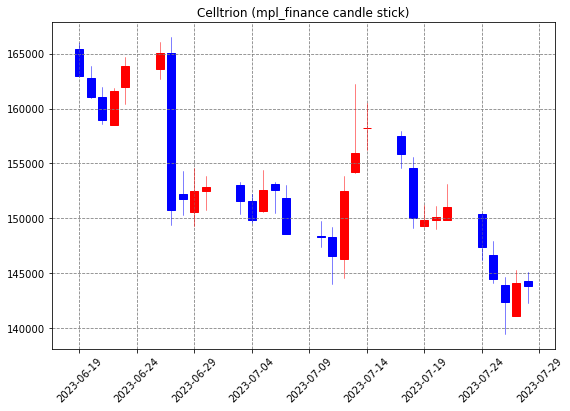

In [8]:
from matplotlib import pyplot as plt
from mplfinance.original_flavor import candlestick_ohlc

# mplfinance.original_flavor로 캔들 차트 그리기
plt.figure(figsize=(9, 6))
ax = plt.subplot(1, 1, 1)    
plt.title('Celltrion (mpl_finance candle stick)')
candlestick_ohlc(ax, ohlc.values, width=0.7, colorup='red', colordown='blue') 
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)
plt.grid(color='gray', linestyle='--')
plt.show()